In [1]:
import re
from tqdm import tqdm
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

অন্তরজাল হতে প্রয়োজনীয় নথিপত্র আমদানি এবং তা হতে প্রবন্ধগুলি নিষ্কর্ষ করা হচ্ছে।

In [ ]:
import os 
import tensorflow as tf
from gensim.corpora import WikiCorpus

def tokenizer_func(text: str, token_min_len: int, token_max_len: int, lower: bool) -> list:
    return [token for token in text.split() if token_min_len <= len(token) <= token_max_len]


def store(corpus, lang):
    base_path = os.getcwd()
    store_path = os.path.join(base_path, '{}_corpus'.format(lang))
    if not os.path.exists(store_path):
        os.mkdir(store_path)
    file_idx=1
    for text in corpus.get_texts():
        current_file_path = os.path.join(store_path, 'article_{}.txt'.format(file_idx))
        with open(current_file_path, 'w' , encoding='utf-8') as file:
            file.write(bytes(' '.join(text), 'utf-8').decode('utf-8'))
        file_idx += 1

def retrive_and_extract(lang='bn'):
    origin='https://dumps.wikimedia.org/{}wiki/latest/{}wiki-latest-pages-articles.xml.bz2'.format(lang,lang)
    fname='{}wiki-latest-pages-articles.xml.bz2'.format(lang)
    file_path = tf.keras.utils.get_file(origin=origin, fname=fname, untar=False, extract=False)
    corpus = WikiCorpus(file_path, lemmatize=False, lower=False, tokenizer_func=tokenizer_func)
    store(corpus, lang)


retrive_and_extract()

## পাঠ্য পরিষ্কার করা হচ্ছে।

In [3]:
bd_unicode_range_inverse = r'[^\u0980-\u09ff\s।]'

with open('../Datasets/wiki/all_v2_clean_sentence.txt', 'w', encoding='utf-8') as fout:
  with open('../Datasets/wiki/all_v2.txt', 'r', encoding='utf-8') as fin:
    for line in tqdm(fin):
      if line:
        line = re.sub(bd_unicode_range_inverse, ' ', line)  # বিদেশী অক্ষর অপসারণ
        line = re.sub(r'[।]{2,}', ' ', line)                 # একাধিক দাড়ি অপসারণ
        line = line.strip()                                 # অগ্রণী এবং অনুগামী ফাকা স্থান অপসারণ
        line = re.sub(r'\s+', ' ', line)                    # একাধিক ফাকা স্থান একটি ফাকা স্থান দিয়ে প্রতিস্থাপন
        line = re.sub(r'\s*।\s*', '\n', line)                # এক সারিতে একটি বাক্য
        fout.write(line)

113371it [00:39, 2877.18it/s]


In [ ]:
#!wc -w ../Datasets/wiki/all_v2_clean_sentence.txt
# 42625131 words

## স্টপ ওয়ার্ড অপসারণ

In [5]:
with open('../Datasets/stopwords.txt', 'r', encoding='utf-8') as fin:
  stopwords = fin.read().splitlines()

stopwords[:10]

['অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি']

In [9]:
with open('../Datasets/wiki/all_v2_clean_sentence_no_stopwords.txt', 'w', encoding='utf-8') as fout:
  with open('../Datasets/wiki/all_v2_clean_sentence.txt', 'r', encoding='utf-8') as fin:
    for line in tqdm(fin):
      words = line.split(' ')
      clean_line = [word for word in words if word not in stopwords]
      clean_line = ' '.join(clean_line)
      fout.write(clean_line)

2387135it [03:06, 12804.32it/s]


## শব্দমেঘ তৈরি করা হচ্ছে।

In [3]:
with open('../Datasets/wiki/all_v2_clean_sentence.txt', 'r', encoding='utf-8') as fin:
  text = fin.read().split(' ')

In [4]:
counter = Counter(text)

In [5]:
print(counter.most_common(10))

[('এবং', 683549), ('একটি', 309134), ('থেকে', 257369), ('করা', 251126), ('সালে', 235197), ('করে', 229427), ('এর', 206438), ('তার', 196699), ('জন্য', 195849), ('তিনি', 191838)]


In [10]:
with open('../Datasets/wiki/all_v2_clean_sentence_no_stopwords.txt', 'r', encoding='utf-8') as fin:
  text = fin.read().split(' ')

In [11]:
counter = Counter(text)

In [18]:
most_common_words = counter.most_common(2000)
print(most_common_words[:10])

[('সালে', 235007), ('সালের', 128493), ('হিসেবে', 106179), ('চলচ্চিত্র', 81440), ('একজন', 72061), ('জাতীয়', 64926), ('বছর', 59560), ('১', 58506), ('জন্ম', 56489), ('পুরস্কার', 56472)]


In [19]:
# regex = r"[\u0980-\u09FF]+"
regex = r"([\S]+)"
mask = np.array(Image.open("bd.jpg"))

def plot_world(text):

    wordcloud = WordCloud(
        width = 1000, 
        height = 500, 
        mode='RGBA',
        background_color ='white', 
        colormap='winter',
        font_path='fonts/nirmala.ttf',
        regexp=regex,
        collocations=True,
        mask=mask,
        max_words=2000,
    )

    wordcloud.generate(text) 

    # plot the WordCloud image                        
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize = (15, 15)) 
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

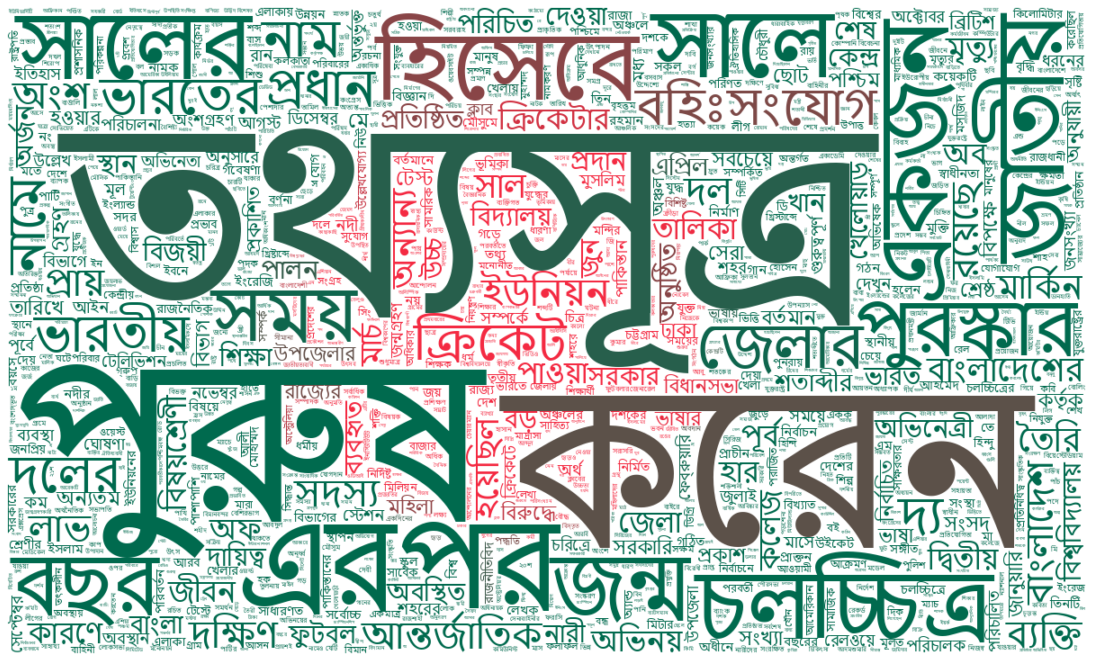

In [20]:
plot_world(' '.join([i[0] for i in most_common_words]))

In [1]:
from tqdm import tqdm

In [2]:

lines = 0

with open('../Datasets/wiki/all_v2_clean_sentence.txt', 'r', encoding='utf-8') as fin:
  data = fin.readlines()
  lines = len(data)

In [3]:
train = int(lines * 0.8)
train

1909708

প্রতি পংক্তিতে ৫১২ এর বেশি বর্ণ থাকলে তা পরের পংক্তিতে সরানো হচ্ছে কারণ আমাদের মডেলে একেবারে একসাথে ৫১২ এর বেশি বর্ণ পড়তে অক্ষম

In [4]:
limit = 512

In [5]:
def limit_sentence(words):
  final_line = ''
  limited_line = ''

  for word in words:

    if len(limited_line) + len(word) + 1 <= limit - 2:
      limited_line += ' ' + word

    else:
      limited_line = limited_line.strip()
      limited_line += '\n'
      final_line += limited_line
      limited_line = ''

  return final_line + '\n'

In [6]:
with open('../Datasets/wiki/train.txt', 'w', encoding='utf-8') as fout:
  limited_line = ''

  for line in tqdm(data[:train]):

    if len(line) <= limit:
      fout.write(line)
      continue

    words = line.split(' ')

    for word in words:

      if len(limited_line) + len(word) + 1 < limit - 1:
        limited_line += ' ' + word

      else:
        limited_line = limited_line.strip()
        limited_line += '\n'
        fout.write(limited_line)
        limited_line = word + ' '

100%|██████████| 1909708/1909708 [00:12<00:00, 149971.81it/s]


In [7]:
with open('../Datasets/wiki/val.txt', 'w', encoding='utf-8') as fout:
  limited_line = ''

  for line in tqdm(data[train:]):

    if len(line) <= limit:
      fout.write(line)
      continue

    words = line.split(' ')

    for word in words:

      if len(limited_line) + len(word) + 1 < limit - 1:
        limited_line += ' ' + word

      else:
        limited_line = limited_line.strip()
        limited_line += '\n'
        fout.write(limited_line)
        limited_line = word + ' '

100%|██████████| 477427/477427 [00:02<00:00, 208511.15it/s]
